In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("/content/drive/MyDrive/Python/Datasets/laptop_price_Dataset.xlsx")
df

# if encoding error comes we need to use encoding='latin' or change the file type while reading it

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [3]:
df.drop(columns=["laptop_ID"],inplace=True)   # I have removed laptop ID column since it was not useful

In [4]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [5]:
df.isnull().sum()   # to check missing values

,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


In [6]:
df.duplicated().sum()     # to check duplicate values

28

In [7]:
df[df.duplicated()]    # to see those duplicate values

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1275,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,729.00
1276,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,459.00
1277,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,289.00
1278,Dell,Inspiron 3552,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,379.00
1279,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,899.00
1280,HP,Pavilion 15-AW003nv,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,549.99
1281,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,805.99
1282,HP,Stream 11-Y000na,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,209.00
1283,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,720.32
1284,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00


In [8]:
df.drop_duplicates(inplace=True,ignore_index=True)   # i have dropped duplicates and have ignored index since it was showing incorrectly till the entire data numbers

In [9]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1275 non-null   object 
 1   Product           1275 non-null   object 
 2   TypeName          1275 non-null   object 
 3   Inches            1275 non-null   float64
 4   ScreenResolution  1275 non-null   object 
 5   Cpu               1275 non-null   object 
 6   Ram               1275 non-null   object 
 7   Memory            1275 non-null   object 
 8   Gpu               1275 non-null   object 
 9   OpSys             1275 non-null   object 
 10  Weight            1275 non-null   object 
 11  Price_euros       1275 non-null   float64
dtypes: float64(2), object(10)
memory usage: 119.7+ KB


In [11]:
df.describe()     # it is giving only for 2 fields since all other are object data type

,Inches,Price_euros
count,1275.000000,1275.000000
mean,15.022902,1134.969059
std,1.429470,700.752504
min,10.100000,174.000000
25%,14.000000,609.000000
50%,15.600000,989.000000
75%,15.600000,1496.500000
max,18.400000,6099.000000


In [12]:
df['Price_euros']

,Price_euros
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60
...,...
1270,638.00
1271,1499.00
1272,229.00
1273,764.00


In [13]:
df["Price"]=round(df['Price_euros']*93.25184).astype("int")   # i have converted it to INR and even have made it integer

In [14]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,124929
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,83828
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,53620
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,236622
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,168189


In [15]:
df.drop(columns=['Price_euros'],inplace=True)   # I have dropped the price in euros column since i created my own INR price column

In [16]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,124929
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,83828
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,53620
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,236622
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,168189


In [17]:
df['Price'].describe()

,Price
count,1275.000000
mean,105837.960000
std,65346.456907
min,16226.000000
25%,56790.000000
50%,92226.000000
75%,139551.500000
max,568743.000000


<Axes: xlabel='Price', ylabel='Density'>

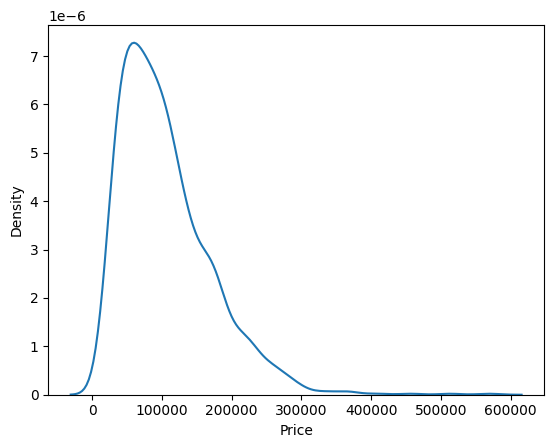

In [18]:
sns.kdeplot(df['Price'])   # As per review the data is skewed and not normally distributed

In [19]:
df['Price'].skew()   # If skew is 0 than data is normal distribution, greater than 1 means more weight in left tail, lesser than 0 then more weight in right tail

1.5111472496205085

In [20]:
df['Price'].kurtosis()   # It will be 3 for normal distribution however depends on outliers it has increased

4.3408196587754455

In [21]:
# The data is Right skewed
# For a normally distributed data, ideally skew=0, kurtosis=3

# Typically, for right skewed data, log operation can be performed
# Or we could eliminate the data points which are outliers

In [22]:
# 3 Ways to deal with this skewed dataclass_transform   ( RY Version )
# First way, Either we can ignore and keep the skewness and go ahead and work
# Second way, we can make it normal distribution by using np.log
# Third way, we can remove the outliers

<Axes: xlabel='Price', ylabel='Density'>

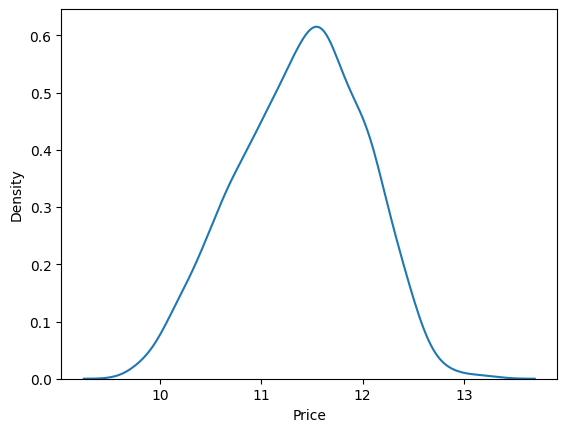

In [23]:
sns.kdeplot(np.log(df['Price']))   # This way we can make the data in almost normal distribution

In [24]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [25]:
# EDA and Feature Engineering

In [26]:
# Company

In [27]:
df['Company'].value_counts()

,count
Company,
Dell,291
Lenovo,289
HP,268
Asus,152
Acer,101
MSI,54
Toshiba,48
Apple,21
Samsung,9


In [28]:
9+7+7+6+4+4+3+3+3+3+2   # all of these companies manufactured less 10 laptops

51

In [29]:
51/1275   # it comes 4% of my complete data

0.04

<Axes: xlabel='Company'>

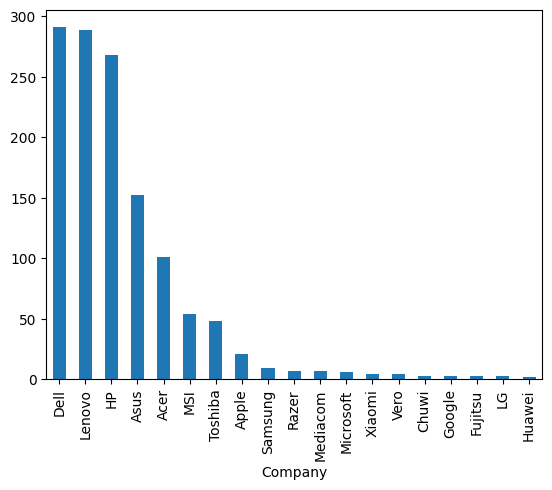

In [30]:
df['Company'].value_counts().plot(kind='bar')   # this is pandas plot method

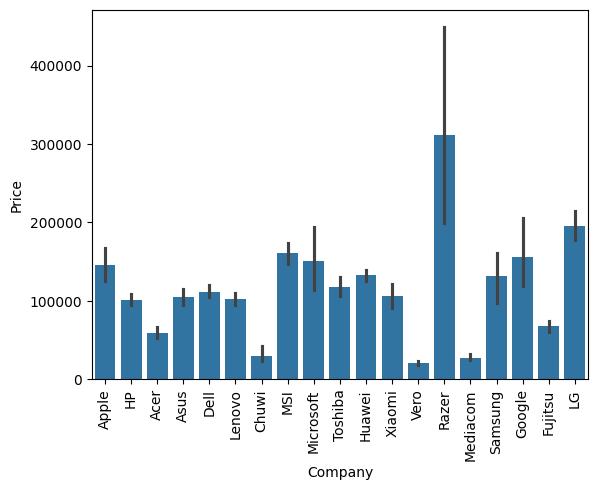

In [31]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')          # to rotate the x-axis ticks
plt.show()

In [32]:
df.groupby('Company').Company.transform('count')    # I have grouped the data by Company and then i need company and then transformed it by the count. So that the count can be considered instead of the name

,Company
0,21
1,21
2,268
3,21
4,21
...,...
1270,289
1271,289
1272,289
1273,268


In [33]:
# Group by i am doing so that company name should be replaced with the total count in backend and post which i can do remove the data which is less than this particular count

In [34]:
df=df[df.groupby('Company').Company.transform('count')>20]   # I have made all the counts more than 20 permanent and further all i have kind of dropped

In [35]:
df['Company'].value_counts()

,count
Company,
Dell,291
Lenovo,289
HP,268
Asus,152
Acer,101
MSI,54
Toshiba,48
Apple,21


In [36]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,124929
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,83828
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,53620
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,236622
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,168189
...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,59495
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,139785
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,21355
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,71244


In [37]:
df.reset_index(drop=True,inplace=True)  # First iam resetting the index since it was not in the previous output because of dropping 50 rows and here drop=True because index column will come here in output

In [38]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,124929
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,83828
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,53620
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,236622
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,168189
...,...,...,...,...,...,...,...,...,...,...,...,...
1219,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,59495
1220,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,139785
1221,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,21355
1222,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,71244


<Axes: xlabel='Company'>

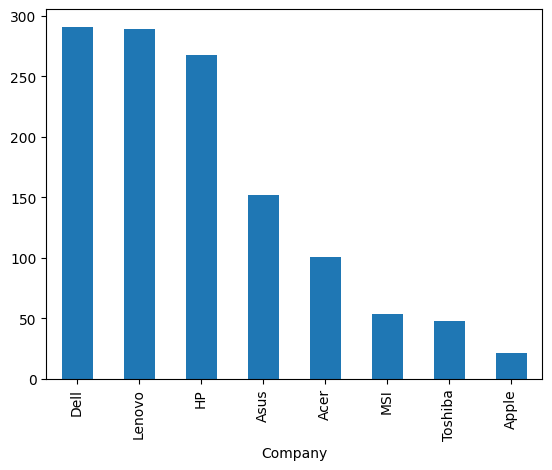

In [39]:
df['Company'].value_counts().plot(kind='bar')   # pandas plot, univaret analysis means single axis data

<Axes: xlabel='Company', ylabel='Price'>

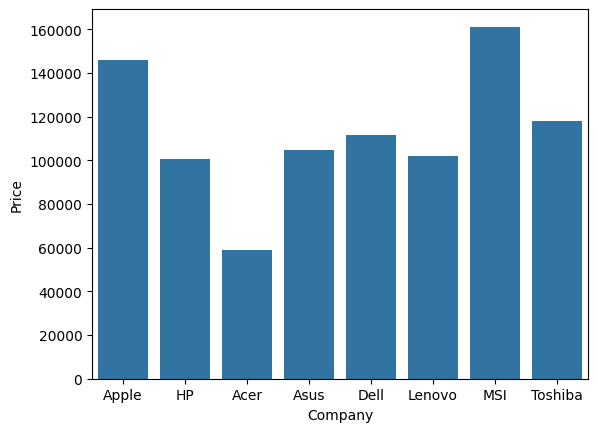

In [40]:
sns.barplot(x=df['Company'],y=df['Price'],errorbar=None)   # sns plot, bivaret analysis means 2 axis data was given

In [41]:
df.groupby('Company')['Price'].mean().sort_values(ascending=False)  # for sorting data in terms of price i have done this calculation # first i have grouped it and then taken only price and the average of it then sort values function as per descending

,Price
Company,
MSI,161223.888889
Apple,145864.428571
Toshiba,118225.854167
Dell,111829.955326
Asus,104799.184211
Lenovo,102004.674740
HP,100741.328358
Acer,59071.762376


In [42]:
df.groupby('Company')['Price'].mean().sort_values(ascending=False).index   # if i add index it will do it properly as per the names aswell because without the index i cannot plot it

Index(['MSI', 'Apple', 'Toshiba', 'Dell', 'Asus', 'Lenovo', 'HP', 'Acer'], dtype='object', name='Company')

In [43]:
company_sorted_price=df.groupby('Company')['Price'].mean().sort_values(ascending=False).index   # I have asssigned to variable so that i can pass it directly in the plot

<Axes: xlabel='Company', ylabel='Price'>

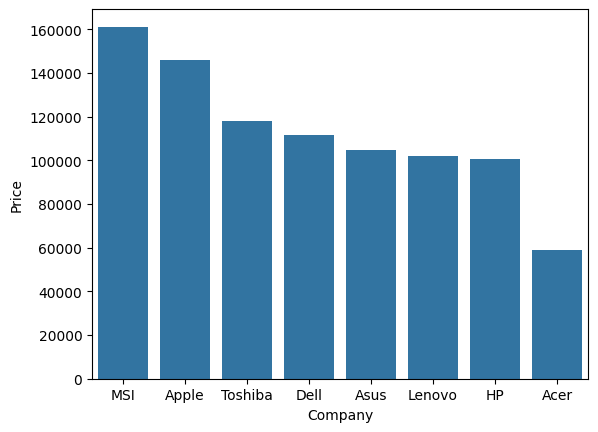

In [44]:
sns.barplot(x=df['Company'],y=df['Price'],errorbar=None,order=company_sorted_price)

<Axes: xlabel='Company', ylabel='Price'>

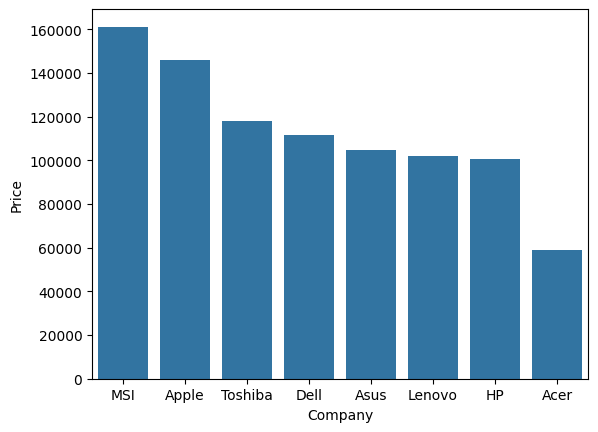

In [45]:
sns.barplot(x=df['Company'],y=df['Price'],errorbar=None,order=['MSI','Apple','Toshiba','Dell','Asus','Lenovo','HP','Acer'])  # i could directly pass aswell but the above is standard one

In [46]:
# Product

In [47]:
df['Product'].value_counts()

,count
Product,
XPS 13,30
Inspiron 3567,25
250 G6,21
Legion Y520-15IKBN,19
Vostro 3568,19
...,...
Ideapad 520-15IKBR,1
Thinkpad X260,1
Rog G752VL-UH71T,1


In [48]:
# I need to delete the complete column since it has all the names of the laptops and bringing it to unique name for our data analysis is very hard and even we don't necessarily need the names of the laptops

In [49]:
df.drop(columns=['Product'],inplace=True)

<ipython-input-49-4bcf6fa0a033>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Product'],inplace=True)


In [50]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,124929
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,83828
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,53620
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,236622
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,168189


In [51]:
# TypeName

In [52]:
df['TypeName'].value_counts()

,count
TypeName,
Notebook,688
Gaming,200
Ultrabook,171
2 in 1 Convertible,114
Workstation,29
Netbook,22


<Axes: xlabel='TypeName'>

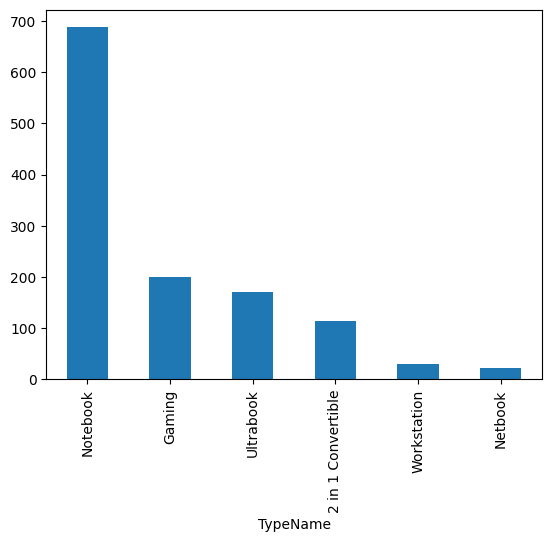

In [53]:
df['TypeName'].value_counts().plot(kind='bar')  # Univaret analysis

<Axes: ylabel='TypeName'>

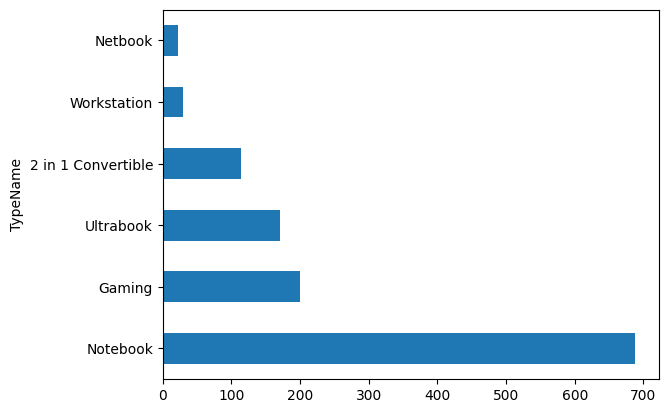

In [54]:
df['TypeName'].value_counts().plot(kind='barh')  # To plot horizontally

In [55]:
df.groupby('TypeName')['Price'].mean().sort_values(ascending=False)  # sorting formula

,Price
TypeName,
Workstation,212647.689655
Gaming,155888.190000
Ultrabook,144559.666667
2 in 1 Convertible,121177.973684
Notebook,74219.122093
Netbook,64508.318182


<ipython-input-56-a2fcd5c1e3d0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['TypeName'],y=df['Price'],errorbar=None,order=a,palette='summer')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When gro

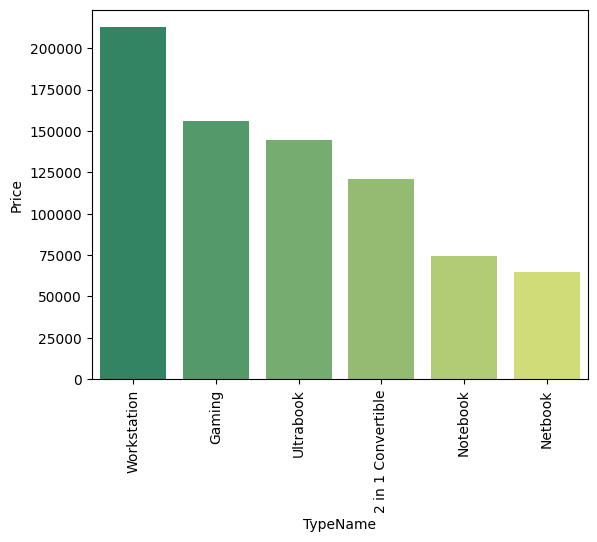

In [56]:
a=df.groupby('TypeName')['Price'].mean().sort_values(ascending=False).index   # directly i wrote the full calculations here itself
sns.barplot(x=df['TypeName'],y=df['Price'],errorbar=None,order=a,palette='summer')
plt.xticks(rotation=90)
plt.show()

In [57]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [58]:
# Inches

In [59]:
df['Inches'].value_counts()

,count
Inches,
15.6,637
14.0,182
17.3,162
13.3,152
12.5,37
11.6,29
12.0,6
13.9,6
15.4,4


In [60]:
# not much to be changed so im not updating anything

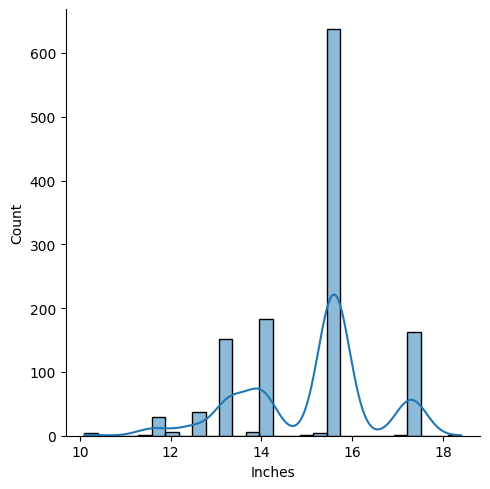

In [61]:
sns.displot(x=df['Inches'],kde=True)    # since the data is continuous so displot will be appropriate to validate the data # Univariate analysis

<Axes: xlabel='Inches', ylabel='Price'>

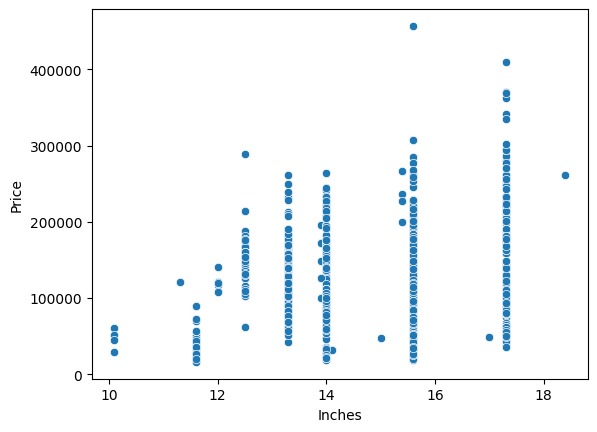

In [62]:
sns.scatterplot(x=df['Inches'],y=df['Price'])  # Bivariate analysis

In [63]:
# Screen Resolution

In [64]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,492
1366x768,258
IPS Panel Full HD 1920x1080,217
IPS Panel Full HD / Touchscreen 1920x1080,48
Full HD / Touchscreen 1920x1080,45
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [65]:
a='IPS Panel Full HD / Touchscreen 1920x1080'  # create a string variable
a

'IPS Panel Full HD / Touchscreen 1920x1080'

In [66]:
a.split()   # split it

['IPS', 'Panel', 'Full', 'HD', '/', 'Touchscreen', '1920x1080']

In [67]:
a.split()[-1]   # take the indexing thing

'1920x1080'

In [68]:
a.split()[-1].split('x')   # split on x basis

['1920', '1080']

In [69]:
int(a.split()[-1].split('x')[0])

1920

In [70]:
int(a.split()[-1].split('x')[1])

1080

In [71]:
(lambda a:int(a.split()[-1].split('x')[0]))("IPS Panel Touchscreen / 4K Ultra HD 3840x2160")  # I have done it by lambda function

3840

In [72]:
df['X-res']=df['ScreenResolution'].apply(lambda a:int(a.split()[-1].split('x')[0]))   # Here i have applied lambda for the entire column directly to get x value
df['Y-res']=df['ScreenResolution'].apply(lambda a:int(a.split()[-1].split('x')[1]))   # Here i have applied lambda for the entire column directly to get y value

<ipython-input-72-a239d09920c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['X-res']=df['ScreenResolution'].apply(lambda a:int(a.split()[-1].split('x')[0]))   # Here i have applied lambda for the entire column directly to get x value
<ipython-input-72-a239d09920c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Y-res']=df['ScreenResolution'].apply(lambda a:int(a.split()[-1].split('x')[1]))   # Here i have applied lambda for the entire column directly to get y value


In [73]:
df.loc[:,'X-res']=df['ScreenResolution'].apply(lambda a:int(a.split()[-1].split('x')[0]))   # Here i have applied lambda for the entire column directly to get x value, pandas expects us to write the code like this with loc and the colon to create new columns
df.loc[:,'Y-res']=df['ScreenResolution'].apply(lambda a:int(a.split()[-1].split('x')[1]))   # Here i have applied lambda for the entire column directly to get y value, pandas expects us to write the code like this with loc and the colon to create new columns

In [74]:
df.loc[:,'IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)            # I have created for IPS thing by using if else function and even have used apply metho
df.loc[:,'Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if "Touchscreen" in x else 0)   # I have created for Touchscreen thing by using if else function and even have used apply method

<ipython-input-74-b324c4a92924>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)            # I have created for IPS thing by using if else function and even have used apply metho
<ipython-input-74-b324c4a92924>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if "Touchscreen" in x else 0)   # I have created for Touchscreen thing by using if else function and even hav

In [75]:
df.head()  # I have done anything on Full HD or Ultra HD because they are just market terms for that particular resolutions and no need in our analysis

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X-res,Y-res,IPS,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,124929,2560,1600,1,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,83828,1440,900,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,53620,1920,1080,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,236622,2880,1800,1,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,168189,2560,1600,1,0


In [76]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X-res,Y-res,IPS,Touchscreen
783,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.13kg,233036,1920,1080,1,0
285,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,2.05kg,68913,1920,1080,0,0
500,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX1050 Ti,Windows 10,3kg,140251,1920,1080,0,0
444,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,1TB HDD,Nvidia GeForce 940MX,Windows 10,2.23kg,50729,1920,1080,0,0
50,Acer,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Nvidia GeForce MX150,Windows 10,2.2kg,78425,1920,1080,1,0


In [77]:
df.drop(columns=['ScreenResolution'],inplace=True)   # I have dropped since i have extracted the data in separate columns which i needed

<ipython-input-77-a2d254f3b685>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['ScreenResolution'],inplace=True)   # I have dropped since i have extracted the data in separate columns which i needed


In [78]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X-res,Y-res,IPS,Touchscreen
159,Dell,Notebook,15.6,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 520,Windows 10,2.13kg,67887,1920,1080,0,0


In [79]:
# RAM

In [80]:
df['Ram'].value_counts()

,count
Ram,
8GB,595
4GB,351
16GB,186
6GB,34
12GB,25
32GB,15
2GB,14
24GB,3
64GB,1


In [81]:
df['Ram']=df['Ram'].apply(lambda x:x.replace('GB','')).astype('int')    # i have replaced gb to nothing and converted to integer
df['Weight']=df['Weight'].apply(lambda x:x.replace('kg','')).astype('float')   # i have replaced kg to nothing and converted to float

<ipython-input-81-e34c4a98d5fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ram']=df['Ram'].apply(lambda x:x.replace('GB','')).astype('int')    # i have replaced gb to nothing and converted to integer
<ipython-input-81-e34c4a98d5fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight']=df['Weight'].apply(lambda x:x.replace('kg','')).astype('float')   # i have replaced kg to nothing and converted to float


In [82]:
print(df.dtypes)

Company         object
TypeName        object
Inches         float64
Cpu             object
Ram              int64
Memory          object
Gpu             object
OpSys           object
Weight         float64
Price            int64
X-res            int64
Y-res            int64
IPS              int64
Touchscreen      int64
dtype: object


In [83]:
df['IPS'].value_counts()

,count
IPS,
0,885
1,339


<Axes: xlabel='IPS'>

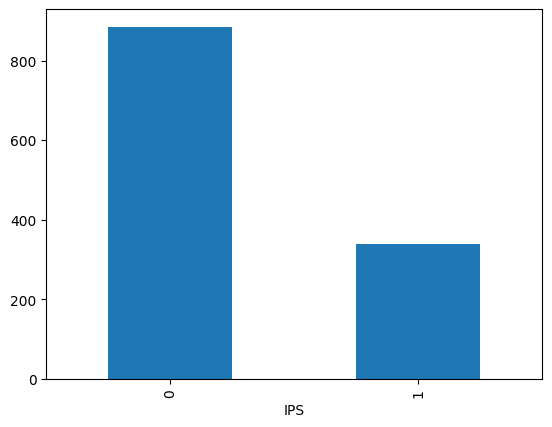

In [84]:
df['IPS'].value_counts().plot(kind='bar')    # Univariate

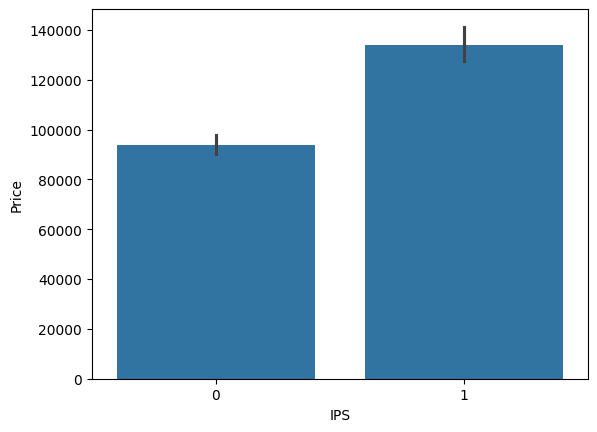

In [85]:
sns.barplot(x=df['IPS'],y=df['Price'])   # bivariate
plt.show()

In [86]:
df['Touchscreen'].value_counts()

,count
Touchscreen,
0,1055
1,169


<Axes: xlabel='Touchscreen'>

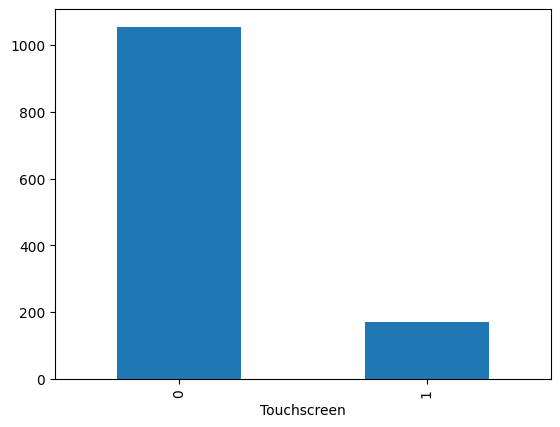

In [87]:
df['Touchscreen'].value_counts().plot(kind='bar')   # Univariate

<Axes: xlabel='Touchscreen', ylabel='Price'>

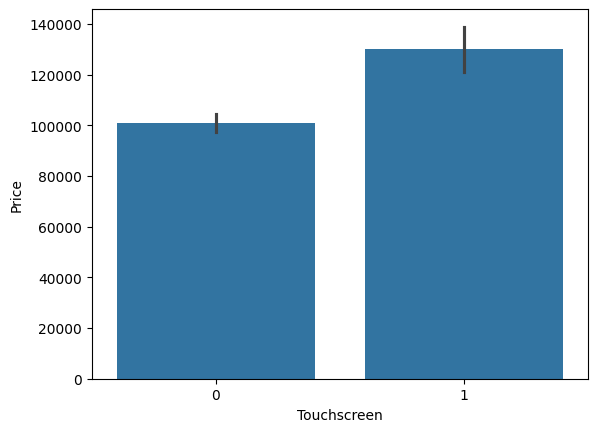

In [88]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])   # bivariate

In [89]:
df['Ram'].value_counts()

,count
Ram,
8,595
4,351
16,186
6,34
12,25
32,15
2,14
24,3
64,1


<Axes: xlabel='Ram'>

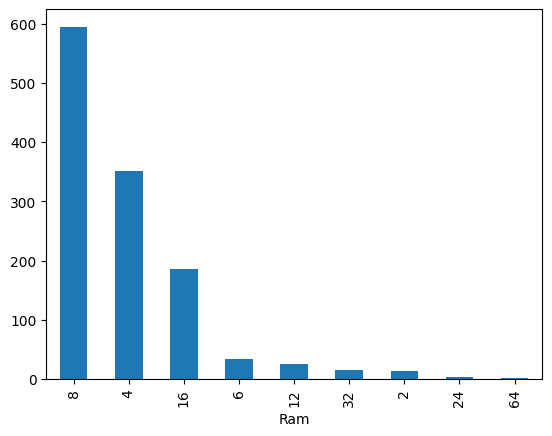

In [90]:
df['Ram'].value_counts().plot(kind='bar')   # Univariate

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

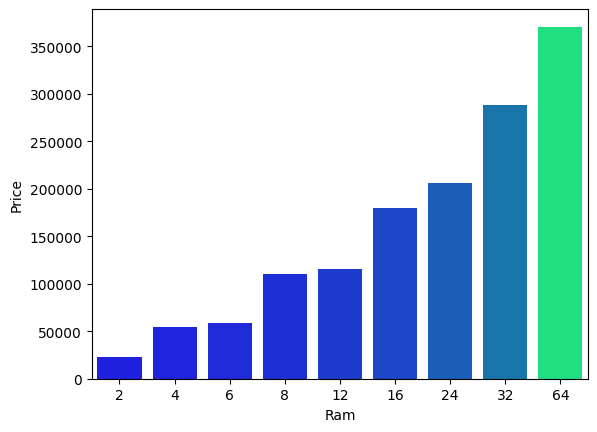

In [91]:
sns.barplot(x=df['Ram'],y=df['Price'],errorbar=None,palette='winter',hue=df['Ram'],legend=False)    # Bivariate  # hue used to remove the unwanted comment lines and legend we used as not to display the hue box
plt.show()

In [92]:
df['Weight'].describe()

,Weight
count,1224.000000
mean,2.063204
std,0.663863
min,0.690000
25%,1.597500
50%,2.060000
75%,2.320000
max,4.700000


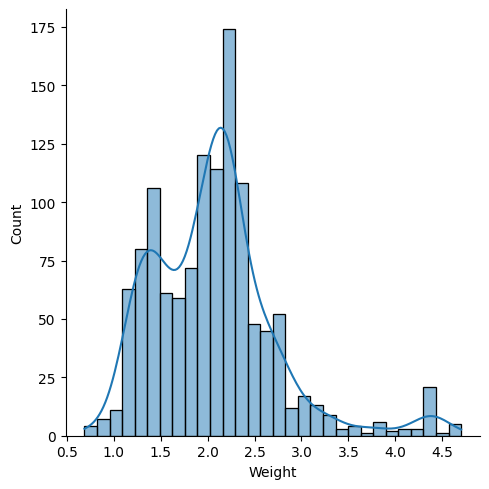

In [93]:
sns.displot(x=df['Weight'],kde=True)   # since it is a continous data so displot instead of bar

<Axes: xlabel='Weight', ylabel='Price'>

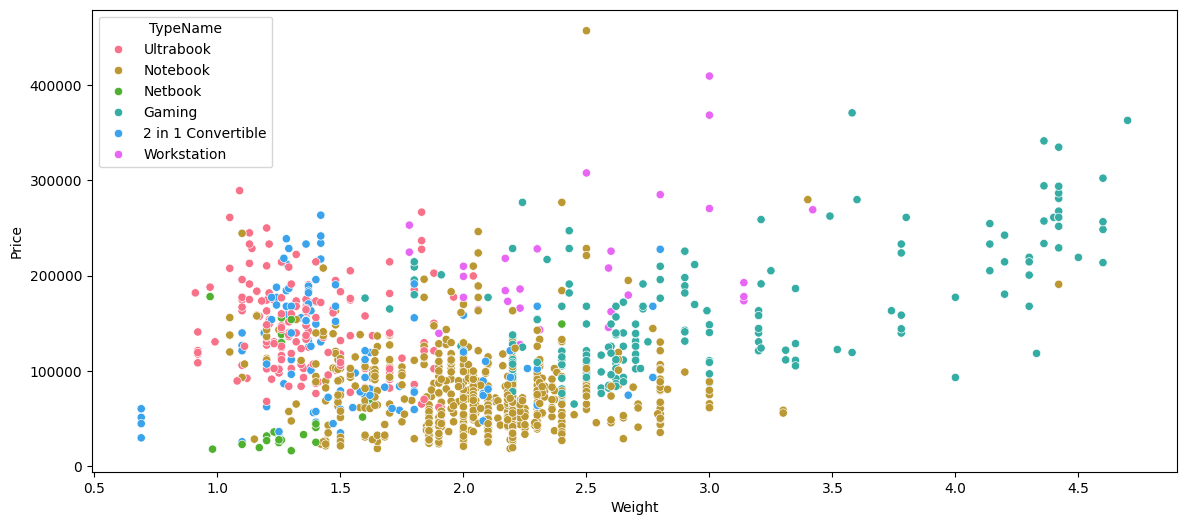

In [94]:
plt.figure(figsize=(14,6))
sns.scatterplot(x=df['Weight'],y=df['Price'],hue=df['TypeName'],palette='husl')

In [95]:
# Cpu

In [96]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,183
Intel Core i7 7700HQ 2.8GHz,142
Intel Core i7 7500U 2.7GHz,124
Intel Core i7 8550U 1.8GHz,71
Intel Core i5 8250U 1.6GHz,71
...,...
AMD E-Series E2-9000 2.2GHz,1
Intel Core M M3-6Y30 0.9GHz,1
Intel Core i5 2.9GHz,1


In [97]:
df['Cpu'].apply(lambda x:x.split()[-1])

,Cpu
0,2.3GHz
1,1.8GHz
2,2.5GHz
3,2.7GHz
4,3.1GHz
...,...
1219,2.5GHz
1220,2.5GHz
1221,1.6GHz
1222,2.5GHz


In [98]:
df['Cpu'].apply(lambda x:x.split()[-1].replace('GHz',''))

,Cpu
0,2.3
1,1.8
2,2.5
3,2.7
4,3.1
...,...
1219,2.5
1220,2.5
1221,1.6
1222,2.5


In [99]:
df['Cpu'].apply(lambda x:x.split()[-1].replace('GHz','')).astype('float')   # Calculations with replace as astype

,Cpu
0,2.3
1,1.8
2,2.5
3,2.7
4,3.1
...,...
1219,2.5
1220,2.5
1221,1.6
1222,2.5


In [100]:
df['Cpu_Speed']=df['Cpu'].apply(lambda x:x.split()[-1].replace('GHz','')).astype('float')  # created a new column

<ipython-input-100-2ab60dccb5fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cpu_Speed']=df['Cpu'].apply(lambda x:x.split()[-1].replace('GHz','')).astype('float')  # created a new column


In [101]:
# Now i want remaining part separately apart from GHz

In [102]:
a='Intel Core i5 7200U 2.5GHz'
a

'Intel Core i5 7200U 2.5GHz'

In [103]:
a.split()[:-1]    # splitting to only get the part without the GHz

['Intel', 'Core', 'i5', '7200U']

In [104]:
' '.join(a.split()[:-1])    # i have joined now, i did same way initially for car names

'Intel Core i5 7200U'

In [105]:
df['Cpu'].apply(lambda a:' '.join(a.split()[:-1]))  # lambda calculation

,Cpu
0,Intel Core i5
1,Intel Core i5
2,Intel Core i5 7200U
3,Intel Core i7
4,Intel Core i5
...,...
1219,Intel Core i7 6500U
1220,Intel Core i7 6500U
1221,Intel Celeron Dual Core N3050
1222,Intel Core i7 6500U


In [106]:
df['Cpu']=df['Cpu'].apply(lambda a:' '.join(a.split()[:-1]))

<ipython-input-106-a8a52200902c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cpu']=df['Cpu'].apply(lambda a:' '.join(a.split()[:-1]))


In [107]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U,186
Intel Core i7 7700HQ,143
Intel Core i7 7500U,124
Intel Core i3 6006U,81
Intel Core i7 8550U,71
...,...
Intel Core M 7Y30,1
Intel Core i5 6440HQ,1
Intel Core i5 7500U,1


In [108]:
df['Cpu']=df['Cpu'].apply(lambda a:" ".join(a.split()[:3]))   # have made it even shorter since the last data was having 87 rows

<ipython-input-108-4bdef42a31a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cpu']=df['Cpu'].apply(lambda a:" ".join(a.split()[:3]))   # have made it even shorter since the last data was having 87 rows


In [109]:
print(df['Cpu'].value_counts())

Cpu
Intel Core i7               493
Intel Core i5               411
Intel Core i3               134
Intel Celeron Dual           66
Intel Pentium Quad           27
Intel Core M                 16
AMD A9-Series 9420           12
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Celeron Quad            5
Intel Atom x5-Z8550           4
AMD A8-Series 7410            4
Intel Pentium Dual            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9600P          2
Intel Xeon E3-1535M           2
AMD E-Series 7110             2
AMD A10-Series 9620P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
Intel Xeon E3-1505M           2
AMD E-Series E2-9000e         2
AMD E-Series 9000e            1
AMD Ryzen 1600                1
AMD E-Series 6110             1
AMD FX 9830P                  1
AMD E-Series E2-6110          1
AMD E-Series E2-9000          1
AMD A6-Series 7310            1
Intel Atom x5-Z8350           1
AMD 

In [110]:
def fetch_processor(text):     # did it way more shorter by creating a user defined function and if statements
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3' or text=='Intel Core M':
        return text
    elif text.split()[0]=="Intel":
        return " ".join(text.split()[0:2])
    else:
        return "AMD "+str(text[4])+" - Series"

In [111]:
df['Cpu']=df['Cpu'].apply(fetch_processor)   # Iam applying this as well to the column name

<ipython-input-111-8894d1479879>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cpu']=df['Cpu'].apply(fetch_processor)   # Iam applying this as well to the column name


In [112]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i7,493
Intel Core i5,411
Intel Core i3,134
Intel Celeron,71
AMD A - Series,45
Intel Pentium,30
Intel Core M,16
AMD E - Series,9
Intel Atom,5


<Axes: xlabel='Cpu'>

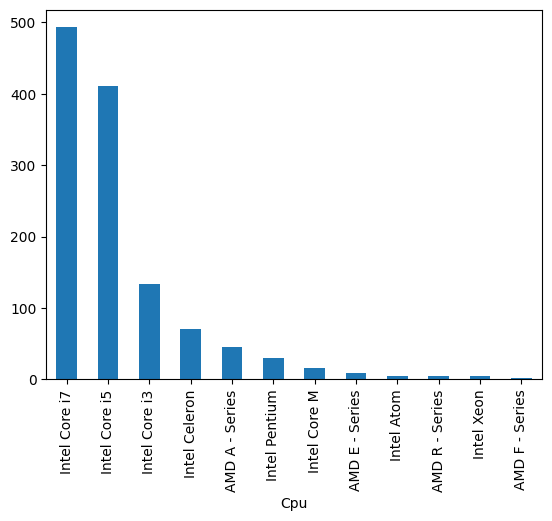

In [113]:
df['Cpu'].value_counts().plot(kind='bar')

<ipython-input-114-bffa3723b18a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Cpu'],y=df['Price'],order=a,errorbar=None,palette='summer')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupin

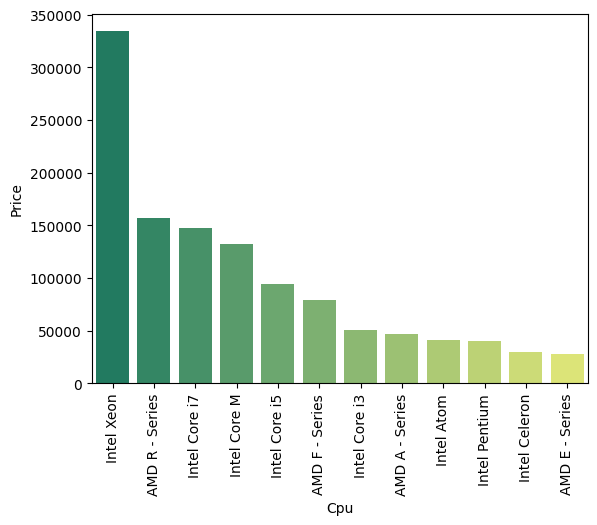

In [114]:
a=df.groupby('Cpu')['Price'].mean().sort_values(ascending=False).index   # Created the sort order
sns.barplot(x=df['Cpu'],y=df['Price'],order=a,errorbar=None,palette='summer')
plt.xticks(rotation=90)
plt.show()

In [115]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X-res,Y-res,IPS,Touchscreen,Cpu_Speed
0,Apple,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,124929,2560,1600,1,0,2.3
1,Apple,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,83828,1440,900,0,0,1.8
2,HP,Notebook,15.6,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,53620,1920,1080,0,0,2.5
3,Apple,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,236622,2880,1800,1,0,2.7
4,Apple,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,168189,2560,1600,1,0,3.1


In [116]:
df['Cpu_Speed']

,Cpu_Speed
0,2.3
1,1.8
2,2.5
3,2.7
4,3.1
...,...
1219,2.5
1220,2.5
1221,1.6
1222,2.5


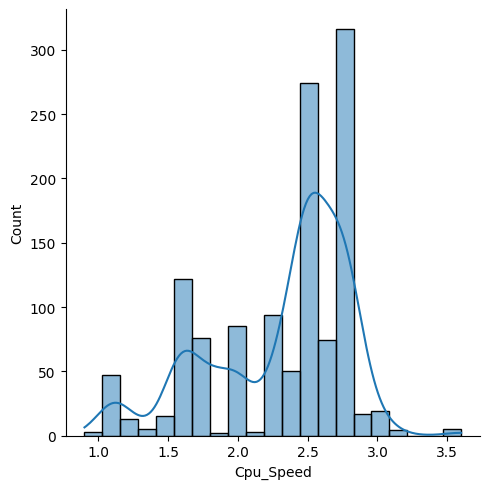

In [117]:
sns.displot(x=df['Cpu_Speed'],kde=True)

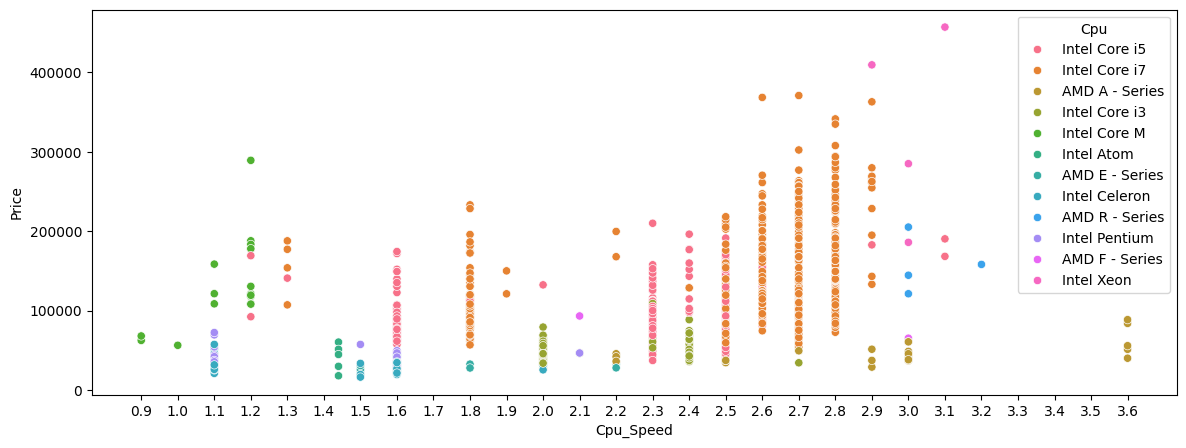

In [118]:
plt.figure(figsize=(14,5))
sns.scatterplot(x=df['Cpu_Speed'],y=df['Price'],hue=df['Cpu'])
plt.xticks(np.arange(0.9,3.7,0.1))
plt.show()

In [119]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X-res,Y-res,IPS,Touchscreen,Cpu_Speed
0,Apple,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,124929,2560,1600,1,0,2.3
1,Apple,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,83828,1440,900,0,0,1.8
2,HP,Notebook,15.6,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,53620,1920,1080,0,0,2.5
3,Apple,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,236622,2880,1800,1,0,2.7
4,Apple,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,168189,2560,1600,1,0,3.1


In [120]:
df.corr(numeric_only=True)

,Inches,Ram,Weight,Price,X-res,Y-res,IPS,Touchscreen,Cpu_Speed
Inches,1.000000,0.239155,0.824959,0.055330,-0.057739,-0.071772,-0.104090,-0.359497,0.296510
Ram,0.239155,1.000000,0.394187,0.726639,0.415731,0.412278,0.223322,0.094037,0.356482
Weight,0.824959,0.394187,1.000000,0.212038,-0.025155,-0.036765,0.038753,-0.291506,0.313267
Price,0.055330,0.726639,0.212038,1.000000,0.553707,0.552964,0.289225,0.161443,0.422535
X-res,-0.057739,0.415731,-0.025155,0.553707,1.000000,0.997454,0.283969,0.320954,0.187056
Y-res,-0.071772,0.412278,-0.036765,0.552964,0.997454,1.000000,0.294360,0.317174,0.178539
IPS,-0.104090,0.223322,0.038753,0.289225,0.283969,0.294360,1.000000,0.154500,0.085098
Touchscreen,-0.359497,0.094037,-0.291506,0.161443,0.320954,0.317174,0.154500,1.000000,-0.105203
Cpu_Speed,0.296510,0.356482,0.313267,0.422535,0.187056,0.178539,0.085098,-0.105203,1.000000


<Axes: >

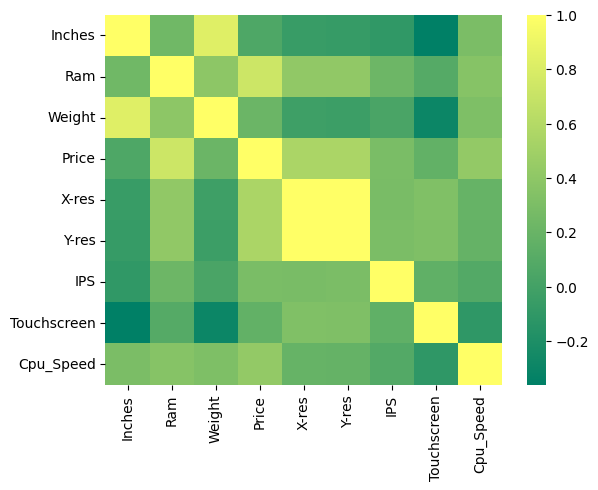

In [121]:
sns.heatmap(df.corr(numeric_only=True),cmap='summer')   # Checking the corelation between the column fields

In [122]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,265
Intel HD Graphics 520,179
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,65
Nvidia GeForce GTX 1060,45
...,...
Intel Graphics 620,1
AMD Radeon R5 520,1
AMD Radeon R7,1


In [123]:
df['Gpu_temp']=df['Gpu'].apply(lambda x:' '.join(x.split()[0:2]))   # I have removed the ending part to make it a bit lesser data to be analysed

<ipython-input-123-fd788a881648>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gpu_temp']=df['Gpu'].apply(lambda x:' '.join(x.split()[0:2]))   # I have removed the ending part to make it a bit lesser data to be analysed


In [124]:
print(df['Gpu_temp'].value_counts())

Gpu_temp
Intel HD          586
Nvidia GeForce    353
AMD Radeon        166
Intel UHD          68
Nvidia Quadro      31
Intel Iris         11
AMD FirePro         5
AMD R4              1
Nvidia GTX          1
AMD R17M-M1-70      1
Intel Graphics      1
Name: count, dtype: int64


In [125]:
# Intel HD
# Nvidia GeForce
# AMD
# Intel UHD
# Nvidia Quadro
# Intel Iris      # These names i need to extract as per my analysis to make the data ordered

In [126]:
def fetch_Gpu(text):             # user defined functions to get the appropriate data
    if text.split()[0]=='AMD':
        return 'AMD GPU'
    elif text=='Intel HD' or text=='Nvidia GeForce' or text=='Intel UHD' or text=='Nvidia Quadro' or text=='Intel Iris':
        return text
    elif text=='Intel Graphics':
        return 'Intel HD'
    elif text=='Nvidia GTX':
        return 'Nvidia GeForce'


In [127]:
df['Gpu_temp']=df['Gpu_temp'].apply(fetch_Gpu)

<ipython-input-127-5fa65e3001d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gpu_temp']=df['Gpu_temp'].apply(fetch_Gpu)


In [128]:
df['Gpu']=df['Gpu_temp']

<ipython-input-128-0228315e0936>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gpu']=df['Gpu_temp']


In [129]:
df.drop(columns=['Gpu_temp'],inplace=True)   # I have dropped it since all the data  i have assigned back to df['Gpu']

<ipython-input-129-09d63ed0c503>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Gpu_temp'],inplace=True)   # I have dropped it since all the data  i have assigned back to df['Gpu']


In [130]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD,587
Nvidia GeForce,354
AMD GPU,173
Intel UHD,68
Nvidia Quadro,31
Intel Iris,11


<Axes: xlabel='Gpu'>

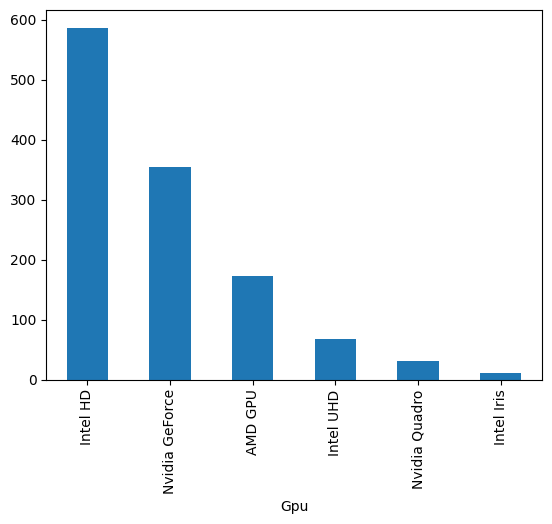

In [131]:
df['Gpu'].value_counts().plot(kind='bar')

<ipython-input-132-1fcf2655ce93>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Gpu'],y=df['Price'],order=a,errorbar=None,palette='winter')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupin

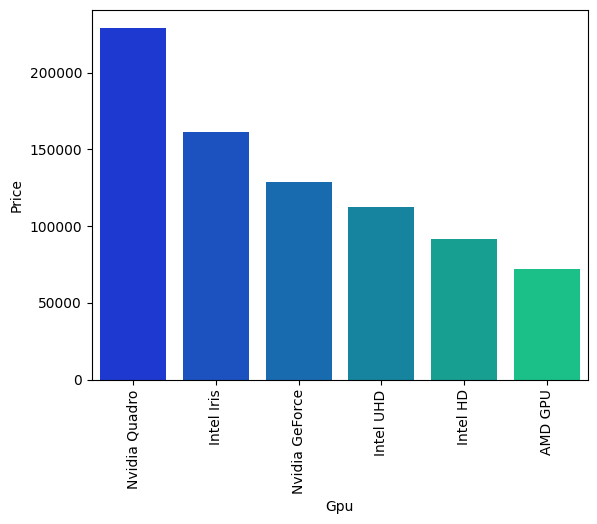

In [132]:
a=df.groupby('Gpu')['Price'].mean().sort_values(ascending=False).index   # to sort the data i have created this line
sns.barplot(x=df['Gpu'],y=df['Price'],order=a,errorbar=None,palette='winter')
plt.xticks(rotation=90)
plt.show()

In [133]:
# OpSys

In [134]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1011
No OS,63
Linux,58
Windows 7,45
Chrome OS,22
macOS,13
Mac OS X,8
Android,2
Windows 10 S,2


In [135]:
def fetch_os(text):
    if text=='Windows 10' or text=='Windows 10 S':
        return 'Windows 10'
    elif text=='macOS' or text=='Mac OS X':
        return 'MacOS'
    elif text=='No OS'or text=='Windows 7':
        return text
    else:
        return "Linux/Chrome OS/Others"

In [136]:
df['OpSys']=df['OpSys'].apply(fetch_os)    # Converted it to some same named things and applied here

<ipython-input-136-9d70dfd56f89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OpSys']=df['OpSys'].apply(fetch_os)    # Converted it to some same named things and applied here


In [137]:
print(df['OpSys'].value_counts())

OpSys
Windows 10                1013
Linux/Chrome OS/Others      82
No OS                       63
Windows 7                   45
MacOS                       21
Name: count, dtype: int64


<Axes: xlabel='OpSys'>

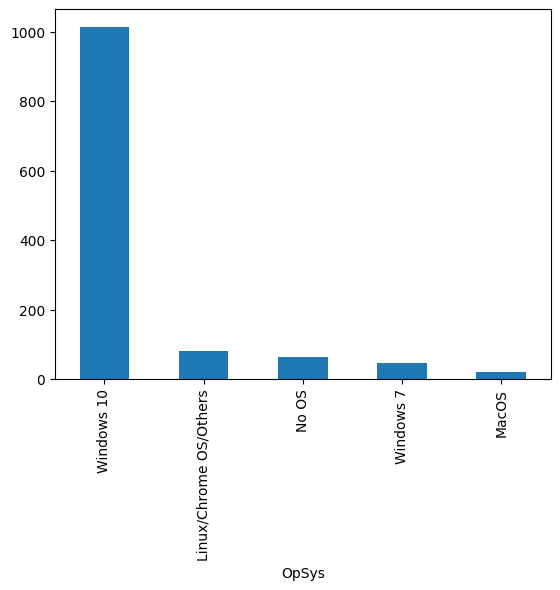

In [138]:
df['OpSys'].value_counts().plot(kind='bar')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

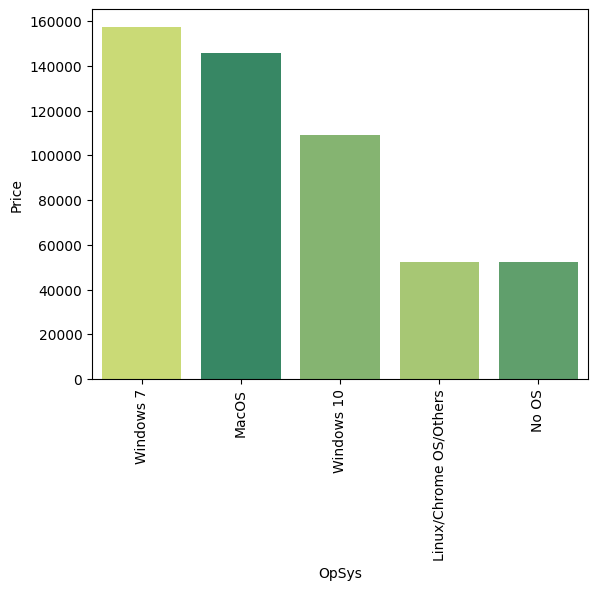

In [139]:
a=df.groupby('OpSys')['Price'].mean().sort_values(ascending=False).index     # one another order by code
sns.barplot(x=df['OpSys'],y=df['Price'],order=a,errorbar=None,palette='summer',hue=df['OpSys'],label=None)  # to remove the written data i have used hue and label thing
plt.xticks(rotation=90)
plt.show()

In [140]:
df[df['OpSys']=='Windows 7']   # to check on Windows 7 data since MacOS came 2nd priced in the previous plot

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X-res,Y-res,IPS,Touchscreen,Cpu_Speed
506,Lenovo,Notebook,14.0,Intel Core i5,8,256GB SSD,Intel HD,Windows 7,2.02,124957,1920,1080,0,0,2.3
596,Lenovo,Notebook,14.0,Intel Core i5,8,256GB SSD,Intel HD,Windows 7,1.65,136614,1920,1080,0,0,2.3
598,HP,Notebook,15.6,Intel Core i5,4,500GB HDD,Intel HD,Windows 7,1.88,86911,1366,768,0,0,2.3
677,Lenovo,Workstation,15.6,Intel Core i7,16,512GB SSD,Nvidia Quadro,Windows 7,2.18,172982,1920,1080,0,0,2.5
717,HP,Workstation,17.3,Intel Xeon,16,256GB SSD,Nvidia Quadro,Windows 7,3.00,409282,1920,1080,1,0,2.9
725,HP,Workstation,15.6,Intel Core i7,8,256GB SSD,Nvidia Quadro,Windows 7,2.59,145566,1920,1080,0,0,2.6
741,Lenovo,Notebook,15.6,Intel Core i7,16,512GB SSD,Nvidia Quadro,Windows 7,2.50,221007,3840,2160,0,0,2.7
804,HP,Ultrabook,14.0,Intel Core i7,8,512GB SSD,Intel HD,Windows 7,1.54,174381,1920,1080,0,0,2.5
907,Toshiba,Notebook,13.3,Intel Core i5,8,256GB SSD,Intel HD,Windows 7,1.20,136148,1920,1080,0,0,2.3
931,Lenovo,Notebook,14.0,Intel Core i5,4,508GB Hybrid,Intel HD,Windows 7,1.70,93438,1366,768,0,0,2.3


In [141]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X-res,Y-res,IPS,Touchscreen,Cpu_Speed
1196,Asus,Gaming,15.6,Intel Core i7,16,256GB SSD + 1TB HDD,Nvidia GeForce,Windows 10,2.34,216811,1920,1080,1,0,2.6


In [142]:
# Memory

In [143]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,393
1TB HDD,214
500GB HDD,124
512GB SSD,105
128GB SSD + 1TB HDD,93
256GB SSD + 1TB HDD,73
128GB SSD,71
32GB Flash Storage,29
2TB HDD,16


In [144]:
# SSD
# HDD
# Flash Storage
# Hybrid
# SSD + HDD
# SSD + Hybrid
# HDD + HDD
# Flash Storage + HDD
# SSD + SSD

# 1TB=1000GB 1TB=1024GB

In [145]:
df['Memory']=df['Memory'].astype('str').replace('\.0','',regex=True)   # To remove the 1.0 TB and make it 1TB we have done through this regex code

<ipython-input-145-2f39c774c3b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Memory']=df['Memory'].astype('str').replace('\.0','',regex=True)   # To remove the 1.0 TB and make it 1TB we have done through this regex code


In [146]:
df['Memory']=df['Memory'].str.replace('GB','')    # Converted gb to none after bringing the data to string type
df['Memory']=df['Memory'].str.replace('TB','000')   # Converted tb to 000 after bringing the data to string type

<ipython-input-146-a411cc9f62e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Memory']=df['Memory'].str.replace('GB','')    # Converted gb to none after bringing the data to string type
<ipython-input-146-a411cc9f62e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Memory']=df['Memory'].str.replace('TB','000')   # Converted tb to 000 after bringing the data to string type


In [147]:
print(df['Memory'].value_counts())

Memory
256 SSD                         393
1000 HDD                        215
500 HDD                         124
512 SSD                         105
128 SSD +  1000 HDD              93
256 SSD +  1000 HDD              73
128 SSD                          71
32 Flash Storage                 29
2000 HDD                         16
512 SSD +  1000 HDD              14
1000 SSD                         12
64 Flash Storage                 10
256 SSD +  2000 HDD              10
256 Flash Storage                 8
1000 Hybrid                       7
16 Flash Storage                  6
180 SSD                           5
128 Flash Storage                 4
16 SSD                            3
512 SSD +  2000 HDD               3
1000 SSD +  1000 HDD              2
512 Flash Storage                 2
128 SSD +  2000 HDD               2
256 SSD +  500 HDD                2
256 SSD +  256 SSD                2
32 SSD                            2
128 HDD                           1
512 SSD +  1000 Hybri

In [148]:
new=df['Memory'].str.split('+',expand=True)    # expand i have used to make it to 2 columns data
df['first']=new[0]     # to make new column for 0 index
df['first']=df['first'].str.strip()    # I have stripped the empty space between the value and the + symbol
df['Second']=new[1]   # to make new column for 1 index

df['Layer1HDD']=df['first'].apply(lambda x:1 if 'HDD' in x else 0)     # to create new column using labmda where it will show 1 if the value belongs
df['Layer1SSD']=df['first'].apply(lambda x:1 if 'SSD' in x else 0)     # to create new column using labmda where it will show 1 if the value belongs
df['Layer1Hybrid']=df['first'].apply(lambda x:1 if 'Hybrid' in x else 0)     # to create new column using labmda where it will show 1 if the value belongs
df['Layer1Flash']=df['first'].apply(lambda x:1 if 'Flash' in x else 0)      # to create new column using labmda where it will show 1 if the value belongs

df['first']=df['first'].str.replace(r'\D','',regex=True)    # I removed the other part in first column exept numeric part

df['Second'].fillna('0',inplace=True)    # replaced null to 0
df['Second'].str.strip() # I have stripped the empty space between the value and the +
df['Layer2HDD']=df['Second'].apply(lambda x:1 if 'HDD' in x else 0)     # to create new column using labmda where it will show 1 if the value belongs
df['Layer2SSD']=df['Second'].apply(lambda x:1 if 'SSD' in x else 0)     # to create new column using labmda where it will show 1 if the value belongs
df['Layer2Hybrid']=df['Second'].apply(lambda x:1 if 'Hybrid' in x else 0)     # to create new column using labmda where it will show 1 if the value belongs
df['Layer2Flash']=df['Second'].apply(lambda x:1 if 'Flash' in x else 0)      # to create new column using labmda where it will show 1 if the value belongs

df['Second']=df['Second'].str.replace(r'\D','',regex=True)    # I removed the other part in first column exept numeric part

df['first']=df['first'].astype('int')     # to convert both of them to integer since null was not getting converted to 0 and even this is the correct way since it is a numeric value
df['Second']=df['Second'].astype('int')   # to convert both of them to integer since null was not getting converted to 0 and even this is the correct way since it is a numeric value

df['HDD']=df['first']*df['Layer1HDD']+df['Second']*df['Layer2HDD']    # to create new proper final columns
df['SSD']=df['first']*df['Layer1SSD']+df['Second']*df['Layer2SSD']     # to create new proper final columns
df['Hybrid']=df['first']*df['Layer1Hybrid']+df['Second']*df['Layer2Hybrid']   # to create new proper final columns
df['Flash']=df['first']*df['Layer1Flash']+df['Second']*df['Layer2Flash']   # to create new proper final columns

df.drop(columns=['first','Second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash',
                 'Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash'],inplace=True)     # To drop the previously created columns

<ipython-input-148-045c67b50c2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['first']=new[0]     # to make new column for 0 index
<ipython-input-148-045c67b50c2e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['first']=df['first'].str.strip()    # I have stripped the empty space between the value and the + symbol
<ipython-input-148-045c67b50c2e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [149]:
df.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X-res,Y-res,IPS,Touchscreen,Cpu_Speed,HDD,SSD,Hybrid,Flash
695,Dell,Notebook,15.6,Intel Core i5,8,128 SSD + 1000 HDD,AMD GPU,Windows 10,2.20,67048,1920,1080,0,0,1.6,1000,128,0,0
519,Lenovo,Notebook,14.0,Intel Core i7,8,256 SSD,Nvidia GeForce,Windows 10,1.87,80103,1920,1080,1,0,2.7,0,256,0,0
656,HP,Notebook,15.6,Intel Core i5,4,500 HDD,AMD GPU,Windows 10,1.86,57127,1366,768,0,0,2.5,500,0,0,0
43,Dell,2 in 1 Convertible,17.3,Intel Core i5,12,1000 HDD,Nvidia GeForce,Windows 10,2.77,93159,1920,1080,0,1,1.6,1000,0,0,0
1099,HP,Notebook,15.6,Intel Core i5,8,256 SSD,Intel HD,Windows 7,1.88,147245,1920,1080,0,0,2.3,0,256,0,0


In [150]:
df.drop(columns=['Memory'],inplace=True)    # I have dropped Memory column since my new columns are extracted and created from it

<ipython-input-150-a743744c52c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Memory'],inplace=True)    # I have dropped Memory column since my new columns are extracted and created from it


In [151]:
df.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,X-res,Y-res,IPS,Touchscreen,Cpu_Speed,HDD,SSD,Hybrid,Flash
434,Dell,Workstation,15.6,Intel Xeon,8,Nvidia Quadro,Windows 10,2.23,185851,1920,1080,0,0,3.0,1000,0,0,64
553,Toshiba,Ultrabook,14.0,Intel Core i7,16,Intel HD,Windows 10,1.24,173915,1920,1080,0,1,2.7,0,512,0,0
1134,Acer,Notebook,15.6,Intel Celeron,4,Intel HD,Windows 10,2.10,31053,1366,768,0,0,2.0,500,0,0,0
307,HP,2 in 1 Convertible,13.3,Intel Core i7,16,Intel UHD,Windows 10,1.29,228374,3840,2160,1,1,1.8,0,1000,0,0
945,HP,Notebook,15.6,Intel Core i3,4,AMD GPU,Windows 10,2.10,46533,1920,1080,0,0,2.0,1000,128,0,0


In [152]:
print(df.corr(numeric_only=True)['Price'])

Inches         0.055330
Ram            0.726639
Weight         0.212038
Price          1.000000
X-res          0.553707
Y-res          0.552964
IPS            0.289225
Touchscreen    0.161443
Cpu_Speed      0.422535
HDD           -0.093770
SSD            0.654751
Hybrid         0.025523
Flash         -0.023384
Name: Price, dtype: float64


In [153]:
df.drop(columns=['Hybrid','Flash'],inplace=True)   # I dropped these 2 columns since the impact on the price is around 2% each so not a big impact

<ipython-input-153-b9266c5bce0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Hybrid','Flash'],inplace=True)   # I dropped these 2 columns since the impact on the price is around 2% each so not a big impact


In [154]:
df.sample(3)

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,X-res,Y-res,IPS,Touchscreen,Cpu_Speed,HDD,SSD
52,HP,Notebook,13.3,Intel Core i7,8,Intel UHD,Windows 10,1.49,102857,1920,1080,0,0,1.8,0,512
912,HP,2 in 1 Convertible,11.6,Intel Pentium,4,Intel HD,Windows 10,1.45,72270,1366,768,0,1,1.1,0,256
1015,Dell,Notebook,15.6,Intel Core i5,4,Intel HD,Windows 10,2.25,52128,1920,1080,0,0,2.5,1000,0


In [155]:
df['HDD'].value_counts()

,count
HDD,
0,667
1000,398
500,126
2000,32
128,1


<Axes: xlabel='HDD', ylabel='Price'>

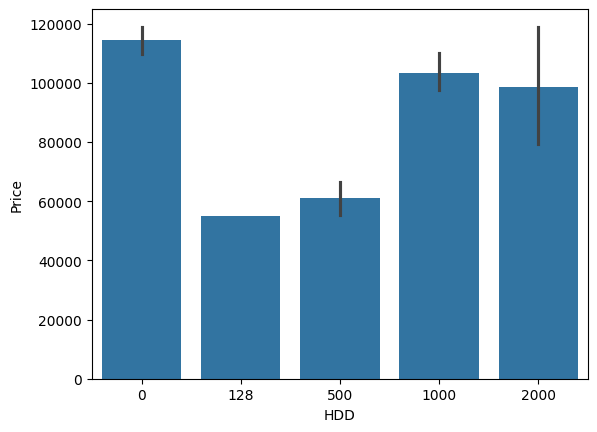

In [156]:
sns.barplot(x=df['HDD'],y=df["Price"])

In [157]:
df['SSD'].value_counts()

,count
SSD,
256,479
0,425
128,166
512,125
1000,14
180,5
16,3
32,2
64,1


<Axes: xlabel='SSD', ylabel='Price'>

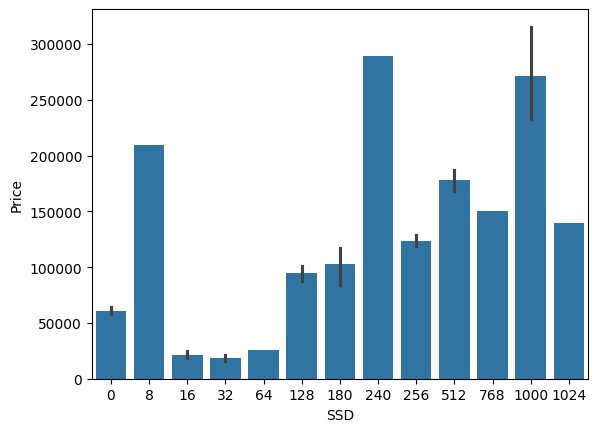

In [158]:
sns.barplot(x=df['SSD'],y=df["Price"])

In [159]:
# Pixel Density

In [160]:
df['PPI']=round(((df['X-res']**2)+(df['Y-res']**2))**0.5/df['Inches']).astype('int')

<ipython-input-160-f292744ade6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PPI']=round(((df['X-res']**2)+(df['Y-res']**2))**0.5/df['Inches']).astype('int')


In [161]:
df['PPI']

,PPI
0,227
1,128
2,141
3,221
4,227
...,...
1219,157
1220,276
1221,112
1222,100


In [162]:
print(df.corr(numeric_only=True)['Price'])

Inches         0.055330
Ram            0.726639
Weight         0.212038
Price          1.000000
X-res          0.553707
Y-res          0.552964
IPS            0.289225
Touchscreen    0.161443
Cpu_Speed      0.422535
HDD           -0.093770
SSD            0.654751
PPI            0.483821
Name: Price, dtype: float64


In [163]:
df.drop(columns=['Inches','X-res','Y-res'],inplace=True)   # Dropping since new column PPI was created

<ipython-input-163-bc23a6035149>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Inches','X-res','Y-res'],inplace=True)   # Dropping since new column PPI was created


<Axes: xlabel='PPI', ylabel='Count'>

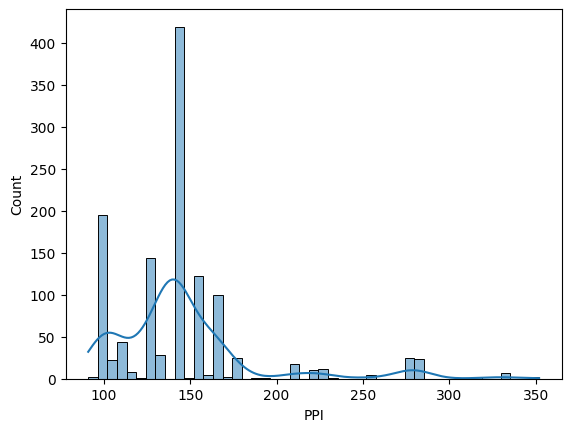

In [164]:
sns.histplot(x=df['PPI'],kde=True)

<Axes: xlabel='PPI', ylabel='Price'>

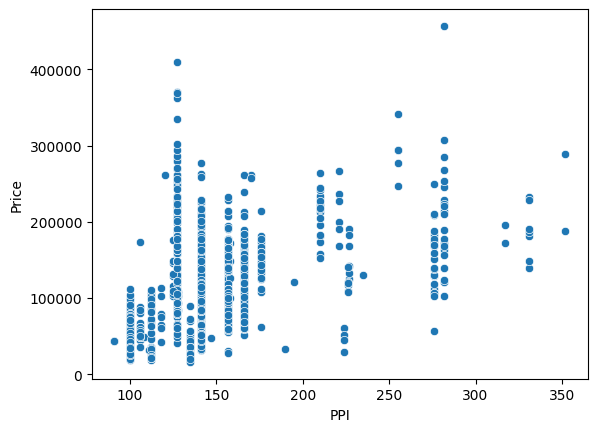

In [165]:
sns.scatterplot(x=df['PPI'],y=df['Price'])

In [166]:
# I have cleaned the data until now

In [167]:
df.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,IPS,Touchscreen,Cpu_Speed,HDD,SSD,PPI
0,Apple,Ultrabook,Intel Core i5,8,Intel Iris,MacOS,1.37,124929,1,0,2.3,0,128,227
1,Apple,Ultrabook,Intel Core i5,8,Intel HD,MacOS,1.34,83828,0,0,1.8,0,0,128
2,HP,Notebook,Intel Core i5,8,Intel HD,No OS,1.86,53620,0,0,2.5,0,256,141
3,Apple,Ultrabook,Intel Core i7,16,AMD GPU,MacOS,1.83,236622,1,0,2.7,0,512,221
4,Apple,Ultrabook,Intel Core i5,8,Intel Iris,MacOS,1.37,168189,1,0,3.1,0,256,227


In [168]:
df.to_csv('laptop_data_processed.csv',index=False)   # i am assigning the data back to a csv file. Iam saving my clean data in CSV file. I can save it and can take it to Tableau

In [169]:
X=df.drop(columns=['Price'])    # Everything as Input apart from Price for predicting it is X
y=df['Price']                   # Price is my output and Y for predicting

In [170]:
from sklearn.model_selection import train_test_split   # to make training and testing data separately this algorithm will help from SKlearn

In [171]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=36,stratify=df['Cpu'])   # default it will be 70% in training and 30% in testing, # random_state means the random_seed kind of to fix the value if multiple people working together, sequence for the train and test should be same as written
# stratify is used when the data for a particular column is less and all that data will go to testing and no data is trained so i will use stratify function to atleast one row of the data ahouls be in training part and we can predict testing data

In [172]:
X_train.shape,X_test.shape

((1040, 13), (184, 13))

In [173]:
1040/1225  # 85% data is in training now and only rest 15% will be testing part

0.8489795918367347

In [174]:
X_train.head()    # indexing will be same for X_train and y_train since it should be matched and analyzed and then the output will be predicted on the testing data

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,IPS,Touchscreen,Cpu_Speed,HDD,SSD,PPI
1129,MSI,Gaming,Intel Core i7,16,Nvidia GeForce,Windows 10,1.91,0,0,2.6,1000,128,141
215,Dell,Gaming,Intel Core i7,16,Nvidia GeForce,Windows 10,4.42,1,0,2.8,1000,256,127
871,HP,Notebook,Intel Core i5,8,Intel HD,Windows 10,1.49,0,0,2.5,0,256,166
409,Dell,Notebook,Intel Core i5,8,Intel HD,Windows 10,2.14,0,0,2.5,1000,0,100
293,Lenovo,Notebook,Intel Core i5,6,Nvidia GeForce,Windows 10,2.80,0,0,2.5,1000,0,106


In [175]:
y_train.head()

,Price
1129,200806
215,229058
871,89522
409,50351
293,60520


In [176]:
X_test.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,IPS,Touchscreen,Cpu_Speed,HDD,SSD,PPI
1012,MSI,Gaming,Intel Core i7,16,Nvidia GeForce,Windows 10,2.94,0,0,2.6,1000,256,141
230,Acer,Gaming,Intel Core i5,8,Nvidia GeForce,Windows 10,2.50,1,0,2.5,0,256,141
589,Dell,Notebook,Intel Core i5,4,Intel HD,Linux/Chrome OS/Others,1.93,0,0,2.6,500,0,100
80,HP,Notebook,Intel Core i5,8,Intel HD,Windows 10,1.63,0,0,1.6,0,256,157
132,HP,Notebook,Intel Core i7,8,Intel UHD,Windows 10,1.63,0,0,1.8,0,256,157


In [177]:
y_test.head()

,Price
1012,169625
230,78891
589,81036
80,80197
132,92133


In [178]:
print(X_train.dtypes)  # Here 5 columns are object/text and we need to convert them either to integer or float and the converting part is called as Encoding

Company         object
TypeName        object
Cpu             object
Ram              int64
Gpu             object
OpSys           object
Weight         float64
IPS              int64
Touchscreen      int64
Cpu_Speed      float64
HDD              int64
SSD              int64
PPI              int64
dtype: object


In [179]:
from sklearn.preprocessing import OneHotEncoder    # to do encoding means convert the data into numeric. but this will do only for one column so will use even the below one
from sklearn.compose import ColumnTransformer    # to do the encoding for all columns
from sklearn.pipeline import Pipeline             # pipeline we are doing since we need to do both encoding and fitting the data into the algorithm model
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score   # algorithm models i have imported

In [180]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor


# I have imported alot of algorithms based on the result on all of this will decide the appropriate Machine learning mode

In [181]:
# Encoding
# (1) For output columns: use LabelEncoder()
# (2) For input columns:
        # (a) If Ordinal Data, use OrdinalEncoder()
        # (b) If Nominal Data, use OneHotEncoder()

In [182]:
X_train.head(1)

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,IPS,Touchscreen,Cpu_Speed,HDD,SSD,PPI
1129,MSI,Gaming,Intel Core i7,16,Nvidia GeForce,Windows 10,1.91,0,0,2.6,1000,128,141


In [183]:
# Linear Regression
# step1= # OneHotEncoder using Column Transformer
# step2= # LinearRegression
# step1+step2 # Pipeline

step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')     # it will create the non-numeric columns to numeric. Inside transformer all the non_numeric data and then drop the first column inside OneHotEncoder. Outside will keep remainder columns as passthrough since the default will be drop
step2=LinearRegression()      # after all the OneHotEncoding the data will be passed to Linear Regression algorithm
pipe=Pipeline([('step1',step1),('step2',step2)])    # to merge both the steps using pipeline
pipe.fit(X_train,y_train)            # we have used the fit function to fit the algorithm and find the patterns in the data
y_pred=pipe.predict(X_test)          # we are predicting the output here
print('R2 score: ',r2_score(y_test,y_pred))    # calculating R2 score
print('MSE: ',mean_squared_error(y_test,y_pred))  # calculating MSE
print('RMSE: ',root_mean_squared_error(y_test,y_pred))  # calculating RMSE
print('MAE: ',mean_absolute_error(y_test,y_pred))  # calculating MAE

R2 score:  0.8239034707814852
MSE:  867280303.4861277
RMSE:  29449.623146759073
MAE:  21547.591094969735


In [184]:
# Since the previous model gave us the accuracy that is R2 score of only 77% so we will go ahead and validate in some other ML Model

In [185]:
X_train[X_train['Cpu']=='AMD F - Series']

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,IPS,Touchscreen,Cpu_Speed,HDD,SSD,PPI
88,Asus,Gaming,AMD F - Series,8,AMD GPU,Windows 10,2.45,0,0,3.0,1000,0,141
900,Lenovo,Gaming,AMD F - Series,16,AMD GPU,Windows 10,2.50,1,0,2.1,1000,512,141


In [186]:
X_test[X_test['Cpu']=='AMD F - Series']   # output will through an error if the data is in not in the train but in test. to eradicate this we will use Stratify option

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,IPS,Touchscreen,Cpu_Speed,HDD,SSD,PPI


In [187]:
# Lasso Regression

In [188]:
# Lasso Regression

step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')     # it will create the non-numeric columns to numeric. Inside transformer all the non_numeric data and then drop the first column inside OneHotEncoder. Outside will keep remainder columns as passthrough since the default will be drop
step2=Lasso(alpha=92)      # after all the OneHotEncoding the data will be passed to Lasso Regression algorithm
pipe=Pipeline([('step1',step1),('step2',step2)])    # to merge both the steps using pipeline
pipe.fit(X_train,y_train)            # we have used the fit function to fit the algorithm and find the patterns in the data
y_pred=pipe.predict(X_test)          # we are predicting the output here
print('R2 score: ',r2_score(y_test,y_pred))    # calculating R2 score
print('MSE: ',mean_squared_error(y_test,y_pred))  # calculating MSE
print('RMSE: ',root_mean_squared_error(y_test,y_pred))  # calculating RMSE
print('MAE: ',mean_absolute_error(y_test,y_pred))  # calculating MAE

R2 score:  0.8214499536753149
MSE:  879363943.464104
RMSE:  29654.071279743428
MAE:  21277.05903990715


In [189]:
# Kneighbors Regressor

In [190]:
# Kneighbors Regressor

step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')     # it will create the non-numeric columns to numeric. Inside transformer all the non_numeric data and then drop the first column inside OneHotEncoder. Outside will keep remainder columns as passthrough since the default will be drop
step2=KNeighborsRegressor(n_neighbors=9)      # after all the OneHotEncoding the data will be passed to KNN Regression algorithm, n_neighbors=9 is used to check whether R2 score increases
pipe=Pipeline([('step1',step1),('step2',step2)])    # to merge both the steps using pipeline
pipe.fit(X_train,y_train)            # we have used the fit function to fit the algorithm and find the patterns in the data
y_pred=pipe.predict(X_test)          # we are predicting the output here
print('R2 score: ',r2_score(y_test,y_pred))    # calculating R2 score
print('MSE: ',mean_squared_error(y_test,y_pred))  # calculating MSE
print('RMSE: ',root_mean_squared_error(y_test,y_pred))  # calculating RMSE
print('MAE: ',mean_absolute_error(y_test,y_pred))  # calculating MAE

R2 score:  0.6740219259231046
MSE:  1605451079.9836283
RMSE:  40068.08056275754
MAE:  27021.857487922705


In [191]:
# Support Vector Regressor

In [192]:
# Support Vector Regressor

step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')     # it will create the non-numeric columns to numeric. Inside transformer all the non_numeric data and then drop the first column inside OneHotEncoder. Outside will keep remainder columns as passthrough since the default will be drop
step2=SVR(C=1000000000)      # after all the OneHotEncoding the data will be passed to SVR Regression algorithm, kernel and degree are used to check whether the R2 score is increasing
pipe=Pipeline([('step1',step1),('step2',step2)])    # to merge both the steps using pipeline
pipe.fit(X_train,y_train)            # we have used the fit function to fit the algorithm and find the patterns in the data
y_pred=pipe.predict(X_test)          # we are predicting the output here
print('R2 score: ',r2_score(y_test,y_pred))    # calculating R2 score
print('MSE: ',mean_squared_error(y_test,y_pred))  # calculating MSE
print('RMSE: ',root_mean_squared_error(y_test,y_pred))  # calculating RMSE
print('MAE: ',mean_absolute_error(y_test,y_pred))  # calculating MAE

R2 score:  0.7691457403742369
MSE:  1136963648.5047
RMSE:  33718.891566964354
MAE:  21623.522987635064


In [193]:
# Decision Tree Regressor

In [194]:
# Decision Tree Regressor

step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')     # it will create the non-numeric columns to numeric. Inside transformer all the non_numeric data and then drop the first column inside OneHotEncoder. Outside will keep remainder columns as passthrough since the default will be drop
step2=DecisionTreeRegressor(max_depth=8)      # after all the OneHotEncoding the data will be passed to Decision Tree Regression algorithm
pipe=Pipeline([('step1',step1),('step2',step2)])    # to merge both the steps using pipeline
pipe.fit(X_train,y_train)            # we have used the fit function to fit the algorithm and find the patterns in the data
y_pred=pipe.predict(X_test)          # we are predicting the output here
print('R2 score: ',r2_score(y_test,y_pred))    # calculating R2 score
print('MSE: ',mean_squared_error(y_test,y_pred))  # calculating MSE
print('RMSE: ',root_mean_squared_error(y_test,y_pred))  # calculating RMSE
print('MAE: ',mean_absolute_error(y_test,y_pred))  # calculating MAE

R2 score:  0.7365304735062119
MSE:  1297594744.8307464
RMSE:  36022.14242421939
MAE:  24203.39842081704


In [195]:
# RandomForestRegressor

In [196]:
# RandomForestRegressor

step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')     # it will create the non-numeric columns to numeric. Inside transformer all the non_numeric data and then drop the first column inside OneHotEncoder. Outside will keep remainder columns as passthrough since the default will be drop
step2=RandomForestRegressor(n_estimators=100,max_depth=12)      # after all the OneHotEncoding the data will be passed to RandomForestRegressor algorithm
pipe=Pipeline([('step1',step1),('step2',step2)])    # to merge both the steps using pipeline
pipe.fit(X_train,y_train)            # we have used the fit function to fit the algorithm and find the patterns in the data
y_pred=pipe.predict(X_test)          # we are predicting the output here
print('R2 score: ',r2_score(y_test,y_pred))    # calculating R2 score
print('MSE: ',mean_squared_error(y_test,y_pred))  # calculating MSE
print('RMSE: ',root_mean_squared_error(y_test,y_pred))  # calculating RMSE
print('MAE: ',mean_absolute_error(y_test,y_pred))  # calculating MAE

R2 score:  0.7726004649619623
MSE:  1119949033.8373911
RMSE:  33465.63960000453
MAE:  20321.335424068075


In [197]:
# GradientBoostingRegressor

In [198]:
# AdaBoostRegressor

In [199]:
# AdaBoostRegressor

step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')     # it will create the non-numeric columns to numeric. Inside transformer all the non_numeric data and then drop the first column inside OneHotEncoder. Outside will keep remainder columns as passthrough since the default will be drop
step2=AdaBoostRegressor()      # after all the OneHotEncoding the data will be passed to AdaBoostRegressor algorithm
pipe=Pipeline([('step1',step1),('step2',step2)])    # to merge both the steps using pipeline
pipe.fit(X_train,y_train)            # we have used the fit function to fit the algorithm and find the patterns in the data
y_pred=pipe.predict(X_test)          # we are predicting the output here
print('R2 score: ',r2_score(y_test,y_pred))    # calculating R2 score
print('MSE: ',mean_squared_error(y_test,y_pred))  # calculating MSE
print('RMSE: ',root_mean_squared_error(y_test,y_pred))  # calculating RMSE
print('MAE: ',mean_absolute_error(y_test,y_pred))  # calculating MAE

R2 score:  0.649648319090879
MSE:  1725491771.4402645
RMSE:  41539.03912514425
MAE:  32118.160794300606


In [200]:
# XGBRegressor

In [201]:
# XGBRegressor


step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')     # it will create the non-numeric columns to numeric. Inside transformer all the non_numeric data and then drop the first column inside OneHotEncoder. Outside will keep remainder columns as passthrough since the default will be drop
step2=XGBRegressor(n_estimators=500,max_depth=13)      # after all the OneHotEncoding the data will be passed to XGBRegressor algorithm
pipe=Pipeline([('step1',step1),('step2',step2)])    # to merge both the steps using pipeline
pipe.fit(X_train,y_train)            # we have used the fit function to fit the algorithm and find the patterns in the data
y_pred=pipe.predict(X_test)          # we are predicting the output here
print('R2 score: ',r2_score(y_test,y_pred))    # calculating R2 score
print('MSE: ',mean_squared_error(y_test,y_pred))  # calculating MSE
print('RMSE: ',root_mean_squared_error(y_test,y_pred))  # calculating RMSE
print('MAE: ',mean_absolute_error(y_test,y_pred))  # calculating MAE

R2 score:  0.7800204753875732
MSE:  1083405224.5145855
RMSE:  32915.121517542444
MAE:  20551.910251783287


In [202]:
# GradientBoostingRegressor

step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')     # it will create the non-numeric columns to numeric. Inside transformer all the non_numeric data and then drop the first column inside OneHotEncoder. Outside will keep remainder columns as passthrough since the default will be drop
step2=GradientBoostingRegressor(n_estimators=500,max_depth=3)      # after all the OneHotEncoding the data will be passed to GradientBoostingRegressor algorithm, n_estimators, max_depth we have taken from sklearn from google and tried whether we can get better R2 score same thing we have done with other algorithms aswell
pipe=Pipeline([('step1',step1),('step2',step2)])    # to merge both the steps using pipeline
pipe.fit(X_train,y_train)            # we have used the fit function to fit the algorithm and find the patterns in the data
y_pred=pipe.predict(X_test)          # we are predicting the output here
print('R2 score: ',r2_score(y_test,y_pred))    # calculating R2 score
print('MSE: ',mean_squared_error(y_test,y_pred))  # calculating MSE
print('RMSE: ',root_mean_squared_error(y_test,y_pred))  # calculating RMSE
print('MAE: ',mean_absolute_error(y_test,y_pred))  # calculating MAE

R2 score:  0.8251647856577701
MSE:  861068292.6444004
RMSE:  29343.965182715172
MAE:  17934.85193289814


In [203]:
# Based on all the ML Algorithms the best accuracy i got was in Linear Regression and Gradient Boosting Regression

In [204]:
import pickle  # instead of joblib we are using for application creation

In [205]:
pickle.dump(df,open('df.pkl','wb'))           # to dump the database file or to extract the file
pickle.dump(pipe,open('pipe.pkl','wb'))      # dumping pipe because the algorithm and data was merged in the pipeline

In [206]:
!pip install streamlit --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.3 MB/s eta 0:00:00


In [207]:
%%writefile app.py
import streamlit as st       # imported
import pickle                # imported
import numpy as np

df=pickle.load(open('df.pkl','rb'))     # Open command to open the file which was dumped
pipe=pickle.load(open('pipe.pkl','rb'))   # even imported pipe

st.title("Laptop Price Predictor App")
st.write("This app is created using the data available on kaggle")
st.write("The prediction here is based on the data available, hence might not align with the real world data")

company=st.selectbox("Manufacturing Company",df['Company'].unique(),index=4)   # iam giving index value since i want that option to come first if i dont mention index data will come normally
typename=st.selectbox("Type of laptop",df['TypeName'].unique(),index=1)
cpu=st.selectbox("Processor",df["Cpu"].unique(),index=0)
ram=st.radio("RAM (in GB)",[4,6,8,12,16,24,32,64,128],index=2,horizontal=True)    # I have taken radio button and horizontal so that the options can come in horizontal format
Gpu=st.selectbox("Graphics Card",df['Gpu'].unique(),index=1)
os=st.selectbox("Operating System",df['OpSys'].unique(),index=2)
weight=st.slider("Weight (in kg)",min_value=0.7,max_value=4.7,value=2.0,step=0.1)
ips=st.radio("IPS Display",['Yes',"No"],horizontal=True)
touchscreen=st.radio("Touchscreen?",['Yes','No'],horizontal=True)
cpu_speed=st.slider("CPU clock speed",min_value=0.9,max_value=3.6,value=2.5,step=0.1)
hdd=st.radio("Hard drive capacity (in GB)[If SSD, set HDD value to 0]",[0,128,500,1000,2000],horizontal=True)
ssd=st.radio("SSD capacity(in GB)",[0,8,16,32,64,128,256,512,1000,2000],horizontal=True,index=7)
screen_size=st.slider("Screen size(measured in inches, calculated diagonally)",min_value=10.0,max_value=18.5,value=15.6,step=0.5)
screen_resolution=st.selectbox("Screen Resolution",["1366x768","1440x900","1600x900","1920x1080",
                                                    "1920x1200","2160x1440","2256x1504","2304x1440",
                                                    "2400x1600","2560x1440","2560x1600","2736x1824",
                                                    "2880x1800","3200x1800","3840x2160"],index=3)

if st.button("PREDICT PRICE"):
    ppi=None
    if (ips=='Yes'):                      # in my data it was 0 or 1 but for user friendly approach i listed as Yes or No so here i can linked it in that aspect
        ips=1
    else:
        ips=0
    if (touchscreen=='Yes'):
        touchscreen=1
    else:
        touchscreen=0
    X_res=int(screen_resolution.split('x')[0])
    Y_res=int(screen_resolution.split('x')[1])
    ppi=((X_res**2)+(Y_res**2))**0.5/screen_size       # I have fixed the PPI issue since PPI is a combinataion of X and Y resolution and normal people will not be knowing PPI

    query=np.array([[company,typename,cpu,ram,Gpu,os,weight,ips,touchscreen,cpu_speed,hdd,ssd,ppi]])
    op=pipe.predict(query)
    f_op=int(round(op[0],-2))    # formula i have made so that the output comes properly in integer
    st.subheader("The estimated price of the laptop with the above selected configuration is ₹ "+str(f_op))     # Updating the output sentence and formatting


Writing app.py


In [208]:
X.sample()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,IPS,Touchscreen,Cpu_Speed,HDD,SSD,PPI
205,Lenovo,Notebook,Intel Core i5,8,Intel HD,No OS,2.2,0,0,2.5,0,256,141


In [209]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'MSI', 'Toshiba'],
      dtype=object)

In [210]:
df['Weight'].describe()

,Weight
count,1224.000000
mean,2.063204
std,0.663863
min,0.690000
25%,1.597500
50%,2.060000
75%,2.320000
max,4.700000


In [211]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.91.189.172:8501

Need to install the following packages:
  localtunnel@2.0.2
Ok to proceed? (y)   Stopping...
^C


In [212]:
op=[97675.98955487578]
op

[97675.98955487578]

In [213]:
int(round(op[0],-2))

97700

In [216]:
import sklearn
sklearn.__version__

'1.5.2'